In [ ]:
#jupyter notebook

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [36]:
data.shape

(17880, 18)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [38]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [39]:
#Data Preprocessing

data['location'] = data.location.fillna('none')
data['department'] = data.department.fillna('not specified')
data['company_profile'] = data.company_profile.fillna('none')
data['requirements'] = data.requirements.fillna('not specified')
data['employment_type'] = data.employment_type.fillna('not specified')
data['required_experience'] = data.required_experience.fillna('not specified')
data['required_education'] = data.required_education.fillna('not specified')
data['industry'] = data.industry.fillna('not specified')
data['function'] = data.function.fillna('not specified')

data.drop(['salary_range', 'benefits','telecommuting','has_questions'], axis=1, inplace=True)

In [40]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            1
requirements           0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [41]:
data.head()

,job_id,title,location,department,company_profile,description,requirements,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,1,Other,Internship,not specified,not specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,1,Full-time,Not Applicable,not specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,1,not specified,not specified,not specified,not specified,not specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [42]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'has_company_logo', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [43]:
print('Data set:')
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()

Data set:
Feature 'title' has 11231 categories
Feature 'location' has 3106 categories
Feature 'department' has 1338 categories
Feature 'company_profile' has 1710 categories
Feature 'description' has 14802 categories
Feature 'requirements' has 11969 categories
Feature 'employment_type' has 6 categories
Feature 'required_experience' has 8 categories
Feature 'required_education' has 14 categories
Feature 'industry' has 132 categories
Feature 'function' has 38 categories



In [44]:
df = data[['job_id','title', 'location','company_profile', 'requirements', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']]

In [45]:
df.isnull().sum()

job_id                 0
title                  0
location               0
company_profile        0
requirements           0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [46]:
df_num = df[['fraudulent']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

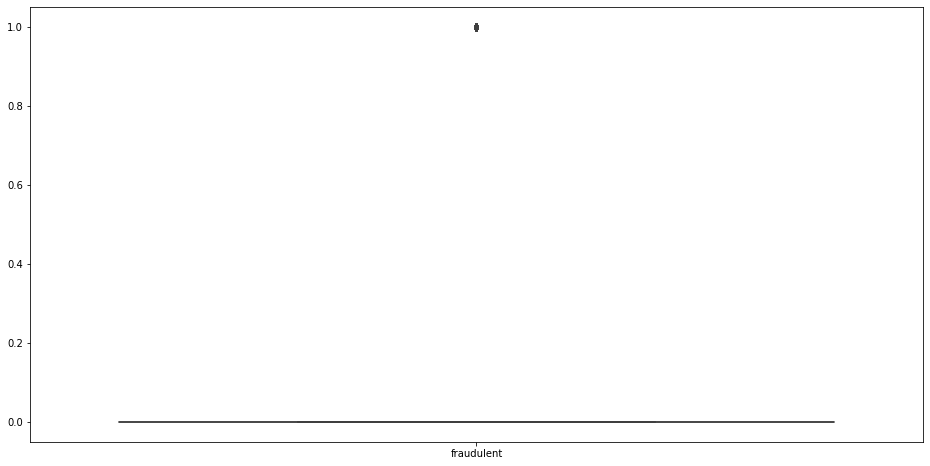

In [47]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

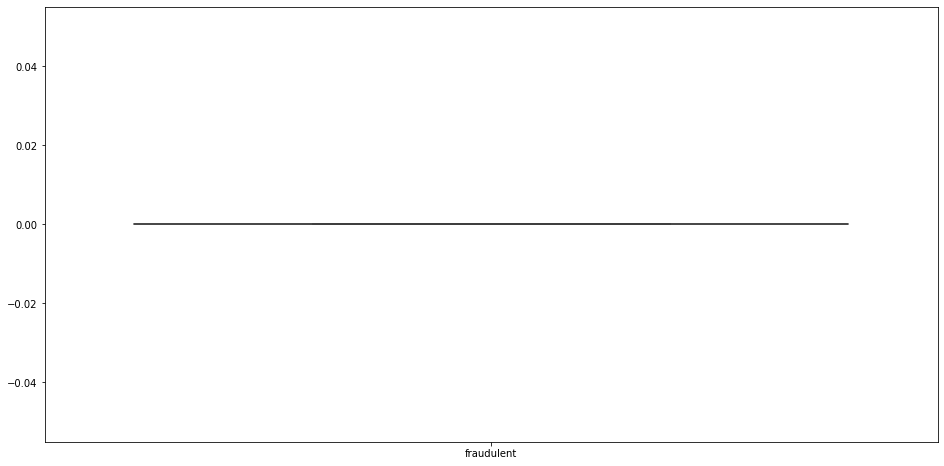

In [48]:
#Removing Outliers from columns
df_num = df_num[df_num['fraudulent'] < 0.9 ]
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

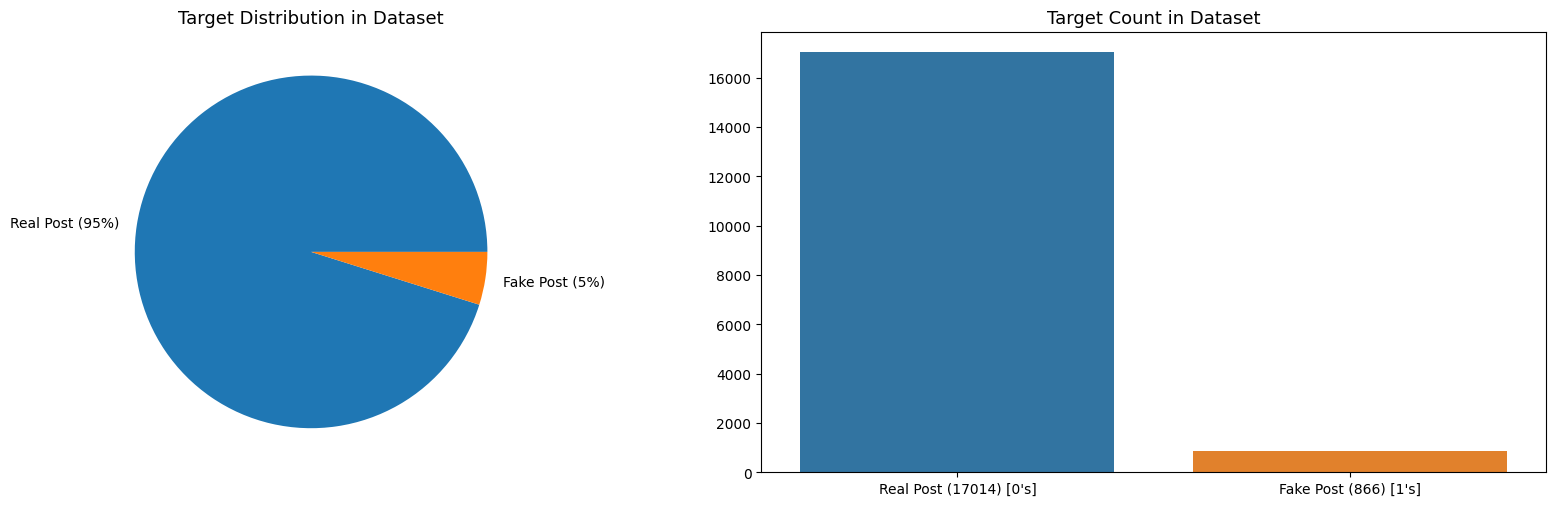

In [49]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


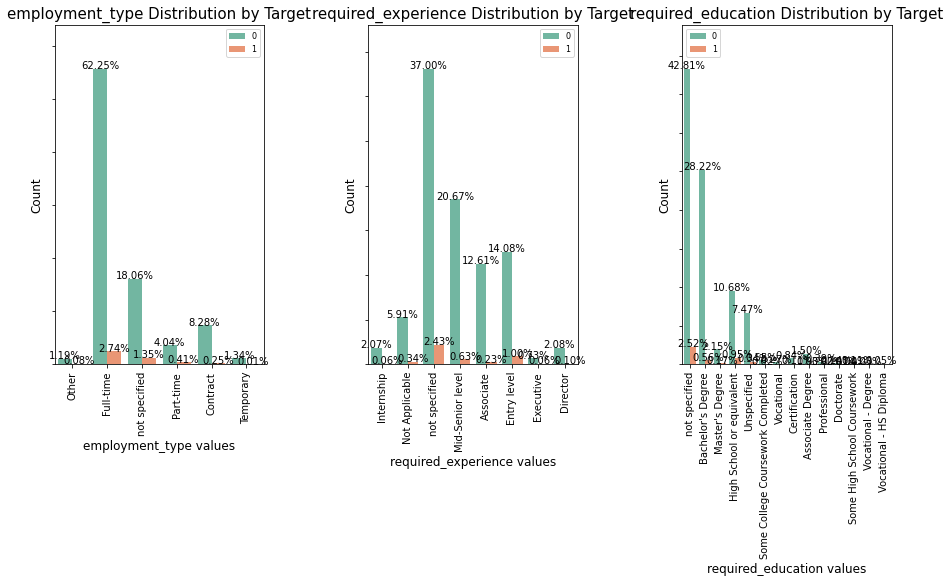

In [50]:
cat_cols = ["employment_type", "required_experience", "required_education",]
# visualizing categorical variable by target
import matplotlib.gridspec as gridspec 
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(15,25))

# loop to get column and the count of plots
for n, col in enumerate(df[cat_cols]): 
    ax = plt.subplot(grid[n]) 
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) 
    ax.set_title(f'{col} Distribution by Target', fontsize=15) 
    ax.set_xlabel(f'{col} values', fontsize=12)
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(df)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15)


plt.show()

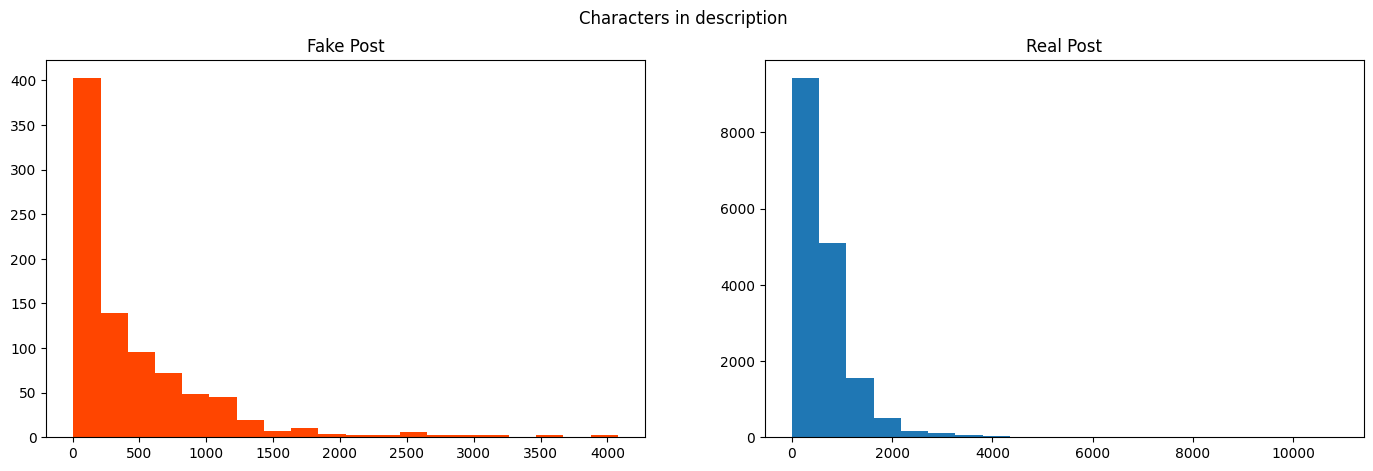

In [51]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=df[df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

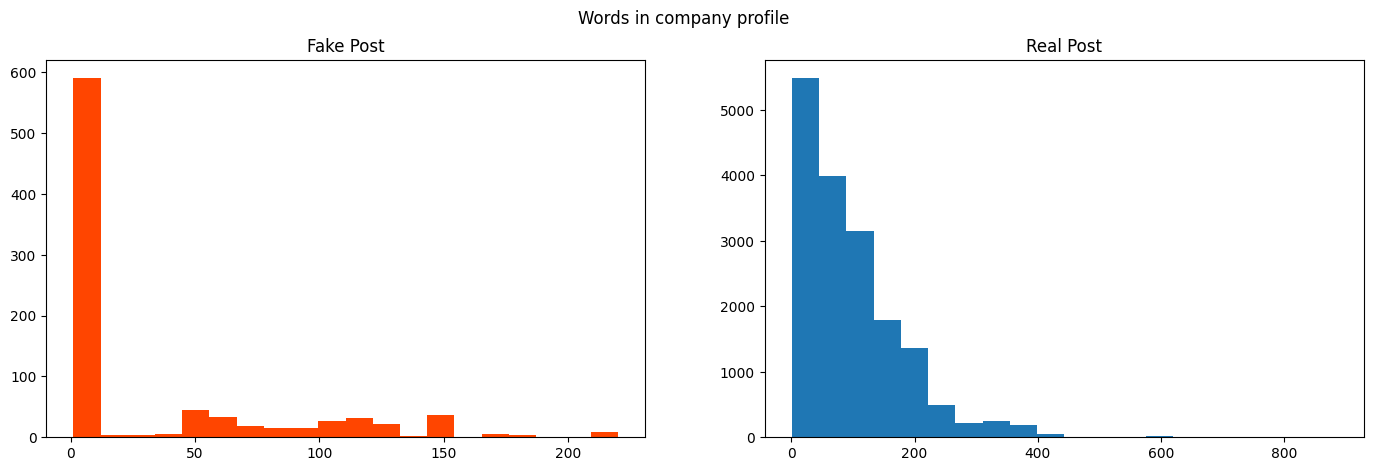

In [52]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=df[df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=df[df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

In [53]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(866, 11)

In [54]:
fraud

,job_id,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",...,"QualificationsKnowledge, Skills &amp; Abilitie...",Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,none,none,not specified,not specified,not specified,not specified,not specified,not specified,1
173,174,Technician Instrument & Controls,US,Edison International and Refined Resources hav...,JOB QUALIFICATIONS-Ability to understand proce...,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",none,Sales Executive,not specified,not specified,not specified,not specified,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",...,"QualificationsKnowledge, Skills &amp; Abiliti...",Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...
17827,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",none,not specified,Part-time,not specified,not specified,not specified,not specified,1
17828,17829,Sales Associate,"AU, NSW, Sydney",none,What You Can Do. • Have the potential to earn ...,not specified,not specified,not specified,not specified,not specified,1
17829,17830,Android Developer,"PL, MZ, Warsaw",none,• A proven track record in Android / JAVA proj...,not specified,not specified,not specified,not specified,not specified,1
17830,17831,Payroll Clerk,"US, NY, New York",none,JOB REQUIREMENTS• High school diploma or eq...,Full-time,not specified,not specified,Apparel & Fashion,Accounting/Auditing,1


In [55]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(17014, 11)

In [56]:
not_fraud

,job_id,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,Other,Internship,not specified,not specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,Full-time,Not Applicable,not specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,not specified,not specified,not specified,not specified,not specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,To ace this role you:Will eat comprehensive St...,Full-time,Mid-Senior level,not specified,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,- B.A. or B.S. in Accounting- Desire to have f...,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,At least 12 years professional experience.Abil...,Full-time,not specified,not specified,not specified,not specified,0
17878,17879,Graphic Designer,"NG, LA, Lagos",none,1. Must be fluent in the latest versions of Co...,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [57]:
df = fraud.append(not_fraud)
df

,job_id,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",...,"QualificationsKnowledge, Skills &amp; Abilitie...",Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,none,none,not specified,not specified,not specified,not specified,not specified,not specified,1
173,174,Technician Instrument & Controls,US,Edison International and Refined Resources hav...,JOB QUALIFICATIONS-Ability to understand proce...,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",none,Sales Executive,not specified,not specified,not specified,not specified,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",...,"QualificationsKnowledge, Skills &amp; Abiliti...",Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,To ace this role you:Will eat comprehensive St...,Full-time,Mid-Senior level,not specified,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,- B.A. or B.S. in Accounting- Desire to have f...,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,At least 12 years professional experience.Abil...,Full-time,not specified,not specified,not specified,not specified,0
17878,17879,Graphic Designer,"NG, LA, Lagos",none,1. Must be fluent in the latest versions of Co...,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])


In [59]:
df.reset_index(inplace = True, drop = True)
df

,job_id,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
0,99,4607,1323,1683,6897,1,5,4,88,23,1
1,145,3626,3105,1674,11495,5,7,13,131,37,1
2,174,10275,1248,453,4651,1,5,2,32,23,1
3,181,8434,1148,1674,8203,5,7,13,131,31,1
4,216,4609,1414,1683,11679,1,5,4,88,23,1
...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,268,166,1391,9679,1,5,13,22,31,0
17876,17877,7101,2734,1546,152,1,5,1,61,0,0
17877,17878,7579,2875,1430,1789,1,7,13,131,37,0
17878,17879,4107,1045,1674,443,0,6,6,48,9,0


In [60]:
from sklearn.model_selection import train_test_split

X = df[['job_id', 'title', 'location', 'company_profile', 'requirements',
       'employment_type','required_experience', 'required_education', 'industry', 'function']].values
Y = df[['fraudulent']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [62]:
import warnings
warnings.filterwarnings('ignore')


In [63]:
### Logistic Regression

clf1=LogisticRegression()
clf1.fit(X_train, Y_train)
preds=clf1.predict(X_test)
print('accuracy with Logistic Regression:',accuracy_score(Y_test, preds), '%')

### Random Forest

clf2=RandomForestClassifier()
clf2.fit(X_train, Y_train)
preds=clf2.predict(X_test)
print('accuracy with Random Forest:',accuracy_score(Y_test, preds), '%')

### Support Vector Machine

clf3=SVC()
clf3.fit(X_train, Y_train)
preds=clf3.predict(X_test)
print('accuracy with Support Vector Machine:',accuracy_score(Y_test, preds), '%')

### Decision Tree

clf4=DecisionTreeClassifier()
clf4.fit(X_train, Y_train)
preds=clf4.predict(X_test)
print('accuracy with Decision Tree:',accuracy_score(Y_test, preds), '%')

### K-Nearest Neighbors

clf5=KNeighborsClassifier()
clf5.fit(X_train, Y_train)
preds=clf5.predict(X_test)
print('accuracy with K-Nearest Neighbors :',accuracy_score(Y_test, preds), '%')

### Naive Bayes

clf6=GaussianNB()
clf6.fit(X_train, Y_train)
preds=clf6.predict(X_test)
print('accuracy with Naive Bayes:',accuracy_score(Y_test, preds), '%')

accuracy with Logistic Regression: 0.9552572706935123 %
accuracy with Random Forest: 0.9859060402684564 %
accuracy with Support Vector Machine: 0.9552572706935123 %
accuracy with Decision Tree: 0.9753914988814317 %
accuracy with K-Nearest Neighbors : 0.9579418344519016 %
accuracy with Naive Bayes: 0.9554809843400447 %


In [67]:
from tkinter import *

window = Tk()

window.title("Fake job recruitment detection")

window.geometry('500x200')

lbl = Label(window, text="Enter job id", width = 10)
lbl.grid(column=0, row=0, padx=(0, 50), pady = 10)

txt = Entry(window,width=20)
txt.grid(column=1, row=0, pady=10)

result = Label(window, text='')
result.grid(column=1, row=2, pady=10)


def check() :
    job_id = txt.get()
    if not job_id :
        result.configure(text="Please enter Id")
    else :
        if job_id.isdigit():
            detect(int(job_id))
        else :
            result.configure(text="Please enter a number")
            
def detect(job_id):
    
    s = ''

    if (job_id < 1 or job_id > 17880) :
        result.configure(text="Please enter valid Id [1 - 17880]")
        
        
    else :
        s = "Posted job with job id '" + str(job_id) + "' is "
        test_df = df.loc[df["job_id"] == job_id]
        del test_df['fraudulent']
        test_df.reset_index(inplace = True, drop = True)
        
        
        print("Logistic Regression : " + str(clf1.predict(test_df)[0]))
        predicted = int(clf2.predict(test_df)[0])
        print("Random Forest : " + str(predicted))
        print("Support Vector Machine : " + str(clf3.predict(test_df)[0]))
        print("Decision Tree : " + str(clf4.predict(test_df)[0]))
        print("K-Nearest Neighbors : " + str(clf5.predict(test_df)[0]))
        print("Naive Bayes : " + str(clf6.predict(test_df)[0]))
        print()
        s +=  "real" if predicted == 0 else "fake"
        result.configure(text=s)

btn = Button(window, text="Detect", command=check)
btn.grid(column=1, row=1,pady=10)

window.mainloop()

Logistic Regression : 0
Random Forest : 1
Support Vector Machine : 0
Decision Tree : 1
K-Nearest Neighbors : 0
Naive Bayes : 0

Logistic Regression : 0
Random Forest : 0
Support Vector Machine : 0
Decision Tree : 0
K-Nearest Neighbors : 1
Naive Bayes : 0

